# Setup and Context

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
# %pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 114.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [109]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
# Get shape of df_data.
print(f"Shape of df_data: {df_data.shape}\n")

# Get number of rows and columns in df_data.
print(f"df_data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.\n")

# Get column name.
print(df_data.columns)

Shape of df_data: (962, 16)

df_data has 962 rows and 16 columns.

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [6]:
# Get year in which the Nobel prize was first awarded.
print(f"Year in which Nobel prize was first awarded: {df_data.year.min()}\n")

# Get latest year in the dataset.
print(f"Latest year in df_data: {df_data.year.max()}")

Year in which Nobel prize was first awarded: 1901

Latest year in df_data: 2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
# Check if there are any duplicate values in dataset df_data.
print(f"Any Duplicate values: {df_data.duplicated().values.any()}.\n")

Any Duplicate values: False.



### Check for NaN Values

In [8]:
# Check if there are any NaN values in dataset df_data.
print(f"Any NaN values: {df_data.isna().values.any()}.\n")

Any NaN values: True.



In [9]:
# Get columns that have NaN values.
print(f"Columns that have NaN values: {df_data.columns[df_data.isna().any()].tolist()}.\n")

Columns that have NaN values: ['motivation', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO'].



In [10]:
# Count NaN values per column.
print(f"{df_data.isna().sum()}\n")

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64



### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Birth Date to Datetime

In [111]:
# Convert birth_date  column to Pandas Datetime objects.
df_data.birth_date = pd.to_datetime(df_data.birth_date)
print(f"Data type of birth_date column after conversion: {df_data.birth_date.dtype}.")

Data type of birth_date column after conversion: datetime64[ns].


#### Add a Column with the Prize Share as a Percentage

In [12]:
# Convert df_data.prize_share column from string data type to float data type.
preprocess_prize_share = df_data.prize_share.astype(str).str.replace("1/1", "100").replace("1/2", "50").replace("1/3", "33.33").replace("1/4", "25")

share_pct = pd.to_numeric(preprocess_prize_share, downcast='float')

share_pct

0     100.00
1     100.00
2     100.00
3      50.00
4      50.00
       ...  
957    33.33
958   100.00
959    25.00
960    25.00
961    50.00
Name: prize_share, Length: 962, dtype: float32

In [13]:
# Add column share_pct.
df_data['share_pct'] = share_pct

df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [14]:
prize_share = df_data.sex.value_counts()

In [15]:
# Create  a donut chart using Plotly.
fig = px.pie(
    labels=prize_share.index,
    values=prize_share.values,
    title="Percentage of Male vs. Female Winners",
    names=prize_share.index,
    hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [16]:
# Get the first 3 Women to Win the Nobel Prize
female_laureates = df_data.loc[df_data.sex == "Female"].head(3)

In [17]:
female_laureates[['full_name', 'prize', 'birth_country', 'organization_name']]

,full_name,prize,birth_country,organization_name
18,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",The Nobel Peace Prize 1905,Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [18]:
# Check if some people won a Nobel Prize more than once.
print(f"Did some people get a Nobel Prize more than once: {df_data.full_name.duplicated().values.any()}.\n")

# Get people who won a Nobel Prize more than once.
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()} winners who were awarded the prize more than once.')

col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

Did some people get a Nobel Prize more than once: True.

There are 6 winners who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


We see that Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.




# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [19]:
# Count the number of categories the prizes are awarded to.
print(f"Number of categories the prizes are awarded to: {df_data.category.nunique()}.")

Number of categories the prizes are awarded to: 6.


In [20]:
# Create a plotly bar chart with the number of prizes awarded by category.
num_categories = df_data.category.value_counts()

bar = px.bar(
    x=num_categories.index,
    y=num_categories.values,
    title='Number of Prizes Awarded per Category',
    hover_name=num_categories.index,
    color=num_categories.values,
    color_continuous_scale='Aggrnyl',
)

bar.update_layout(
    xaxis_title="Nobel Prize Category",
    yaxis_title='Number of Prizes',
    coloraxis_showscale=False,
)

bar.show()

**Medicine** has the most number of prizes awarded while **Economics** has the least.

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [21]:
# Get the data for the first prize in the field of Economics.
df_data[df_data.category == "Economics"].head(1)[['year', 'full_name', 'category']]

,year,full_name,category
393,1969,Jan Tinbergen,Economics


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [22]:
cat_men_women = df_data.groupby(['category', 'sex'],
                                   as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [23]:
# Create a plotly bar chart that shows the split between men and women by category.
g_bar = px.bar(
    data_frame=cat_men_women,
    x='category',
    y='prize',
    color='sex',
    title='Number of Prizes Awarded per Category split by Men and Women',
)
g_bar.update_layout(
    xaxis_title='Nobel Prize Category',
    yaxis_title='Number of Prizes',
)
g_bar.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [24]:
# Count the number of prizes awarded per year.
prize_per_year = df_data.groupby('year').count().prize

# Create a 5 year rolling average of the number of prizes.
moving_average = prize_per_year.rolling(window=5).mean()

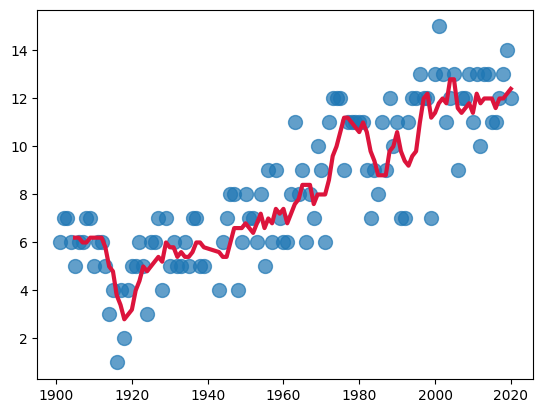

In [25]:
# Using Matplotlib superimpose the rolling average on a scatter plot
plt.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    alpha=0.7,
    s=100,
)
plt.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)
plt.show()

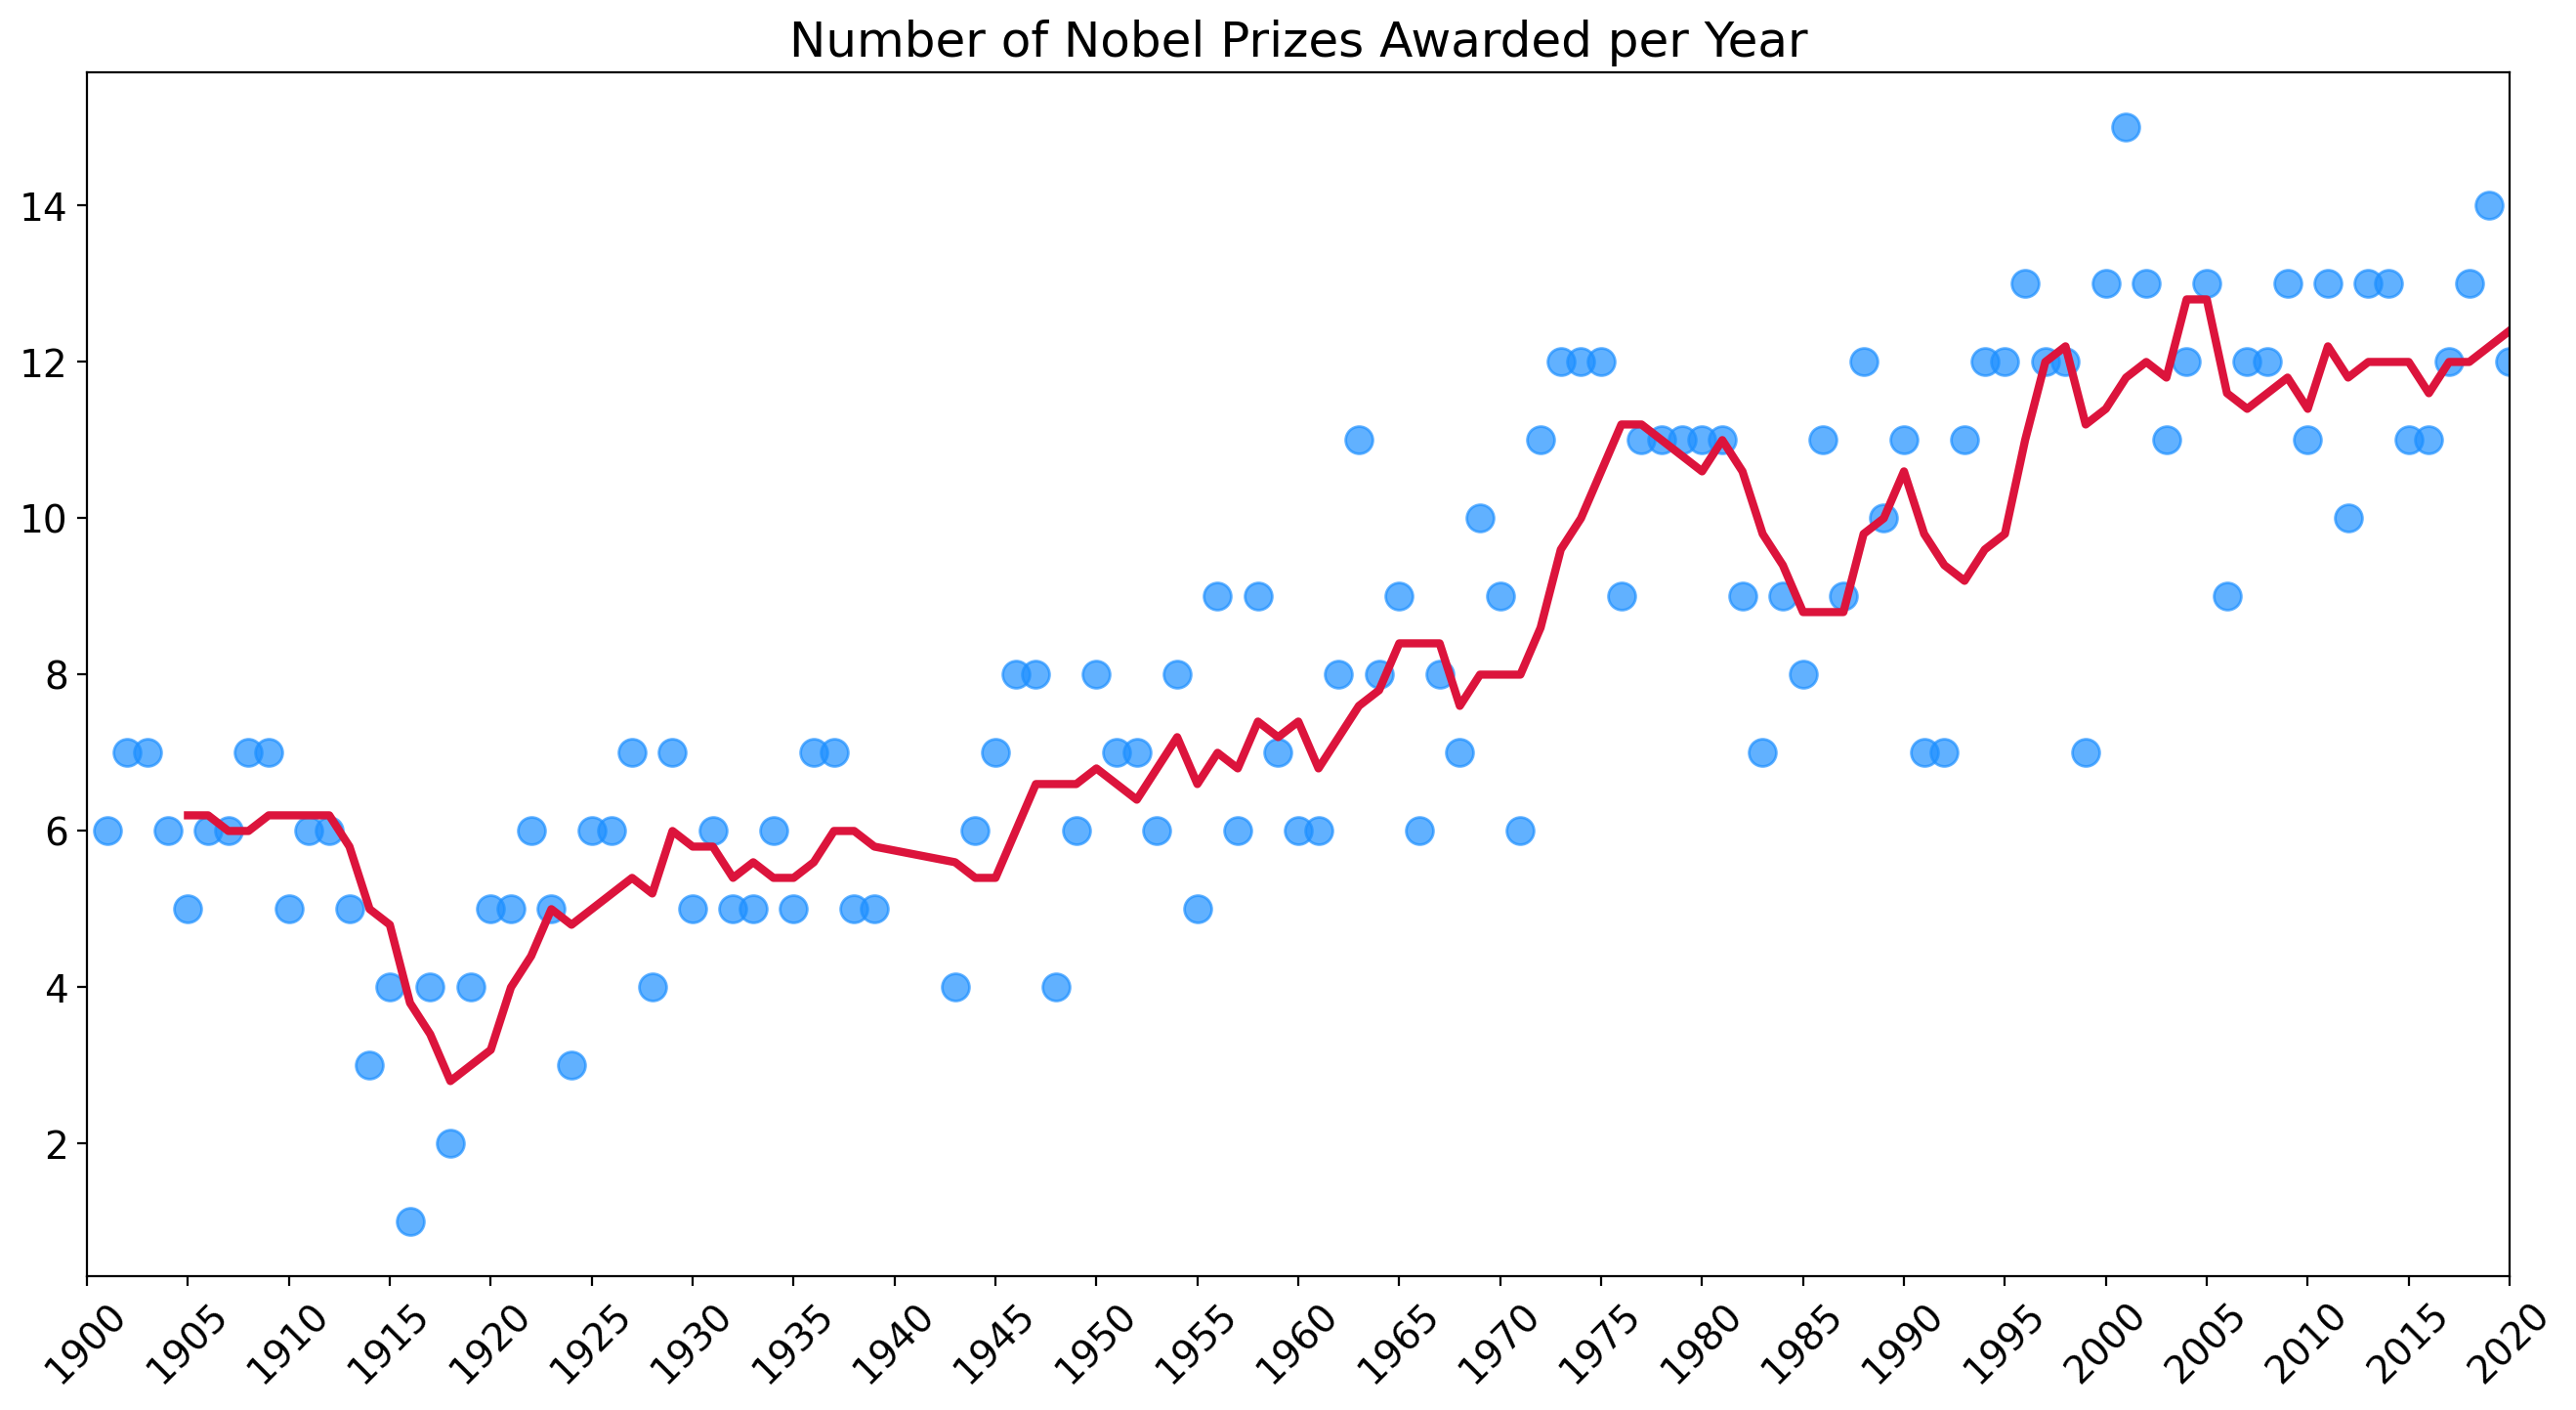

In [26]:
# Show a tick mark on the x-axis for every 5 years from 1900 to 2020.
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
               fontsize=14,
               rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index,
               y=prize_per_year.values,
               c='dodgerblue',
               alpha=0.7,
               s=100,)

ax.plot(prize_per_year.index,
            moving_average.values,
            c='crimson',
            linewidth=3,)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [27]:
# Calculate the average prize share of the winners on a year by year basis.
average_price_per_year = df_data.groupby('year').mean()

average_price_per_year

<ipython-input-27-c235b6710ba5>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,share_pct
year,
1901,83.33
1902,71.43
1903,71.43
1904,83.33
1905,100.00
...,...
2016,54.54
2017,50.00
2018,46.15


In [28]:
# Calculate the 5 year rolling average of the percentage share.
rolling_average = average_price_per_year.rolling(window=5).mean()

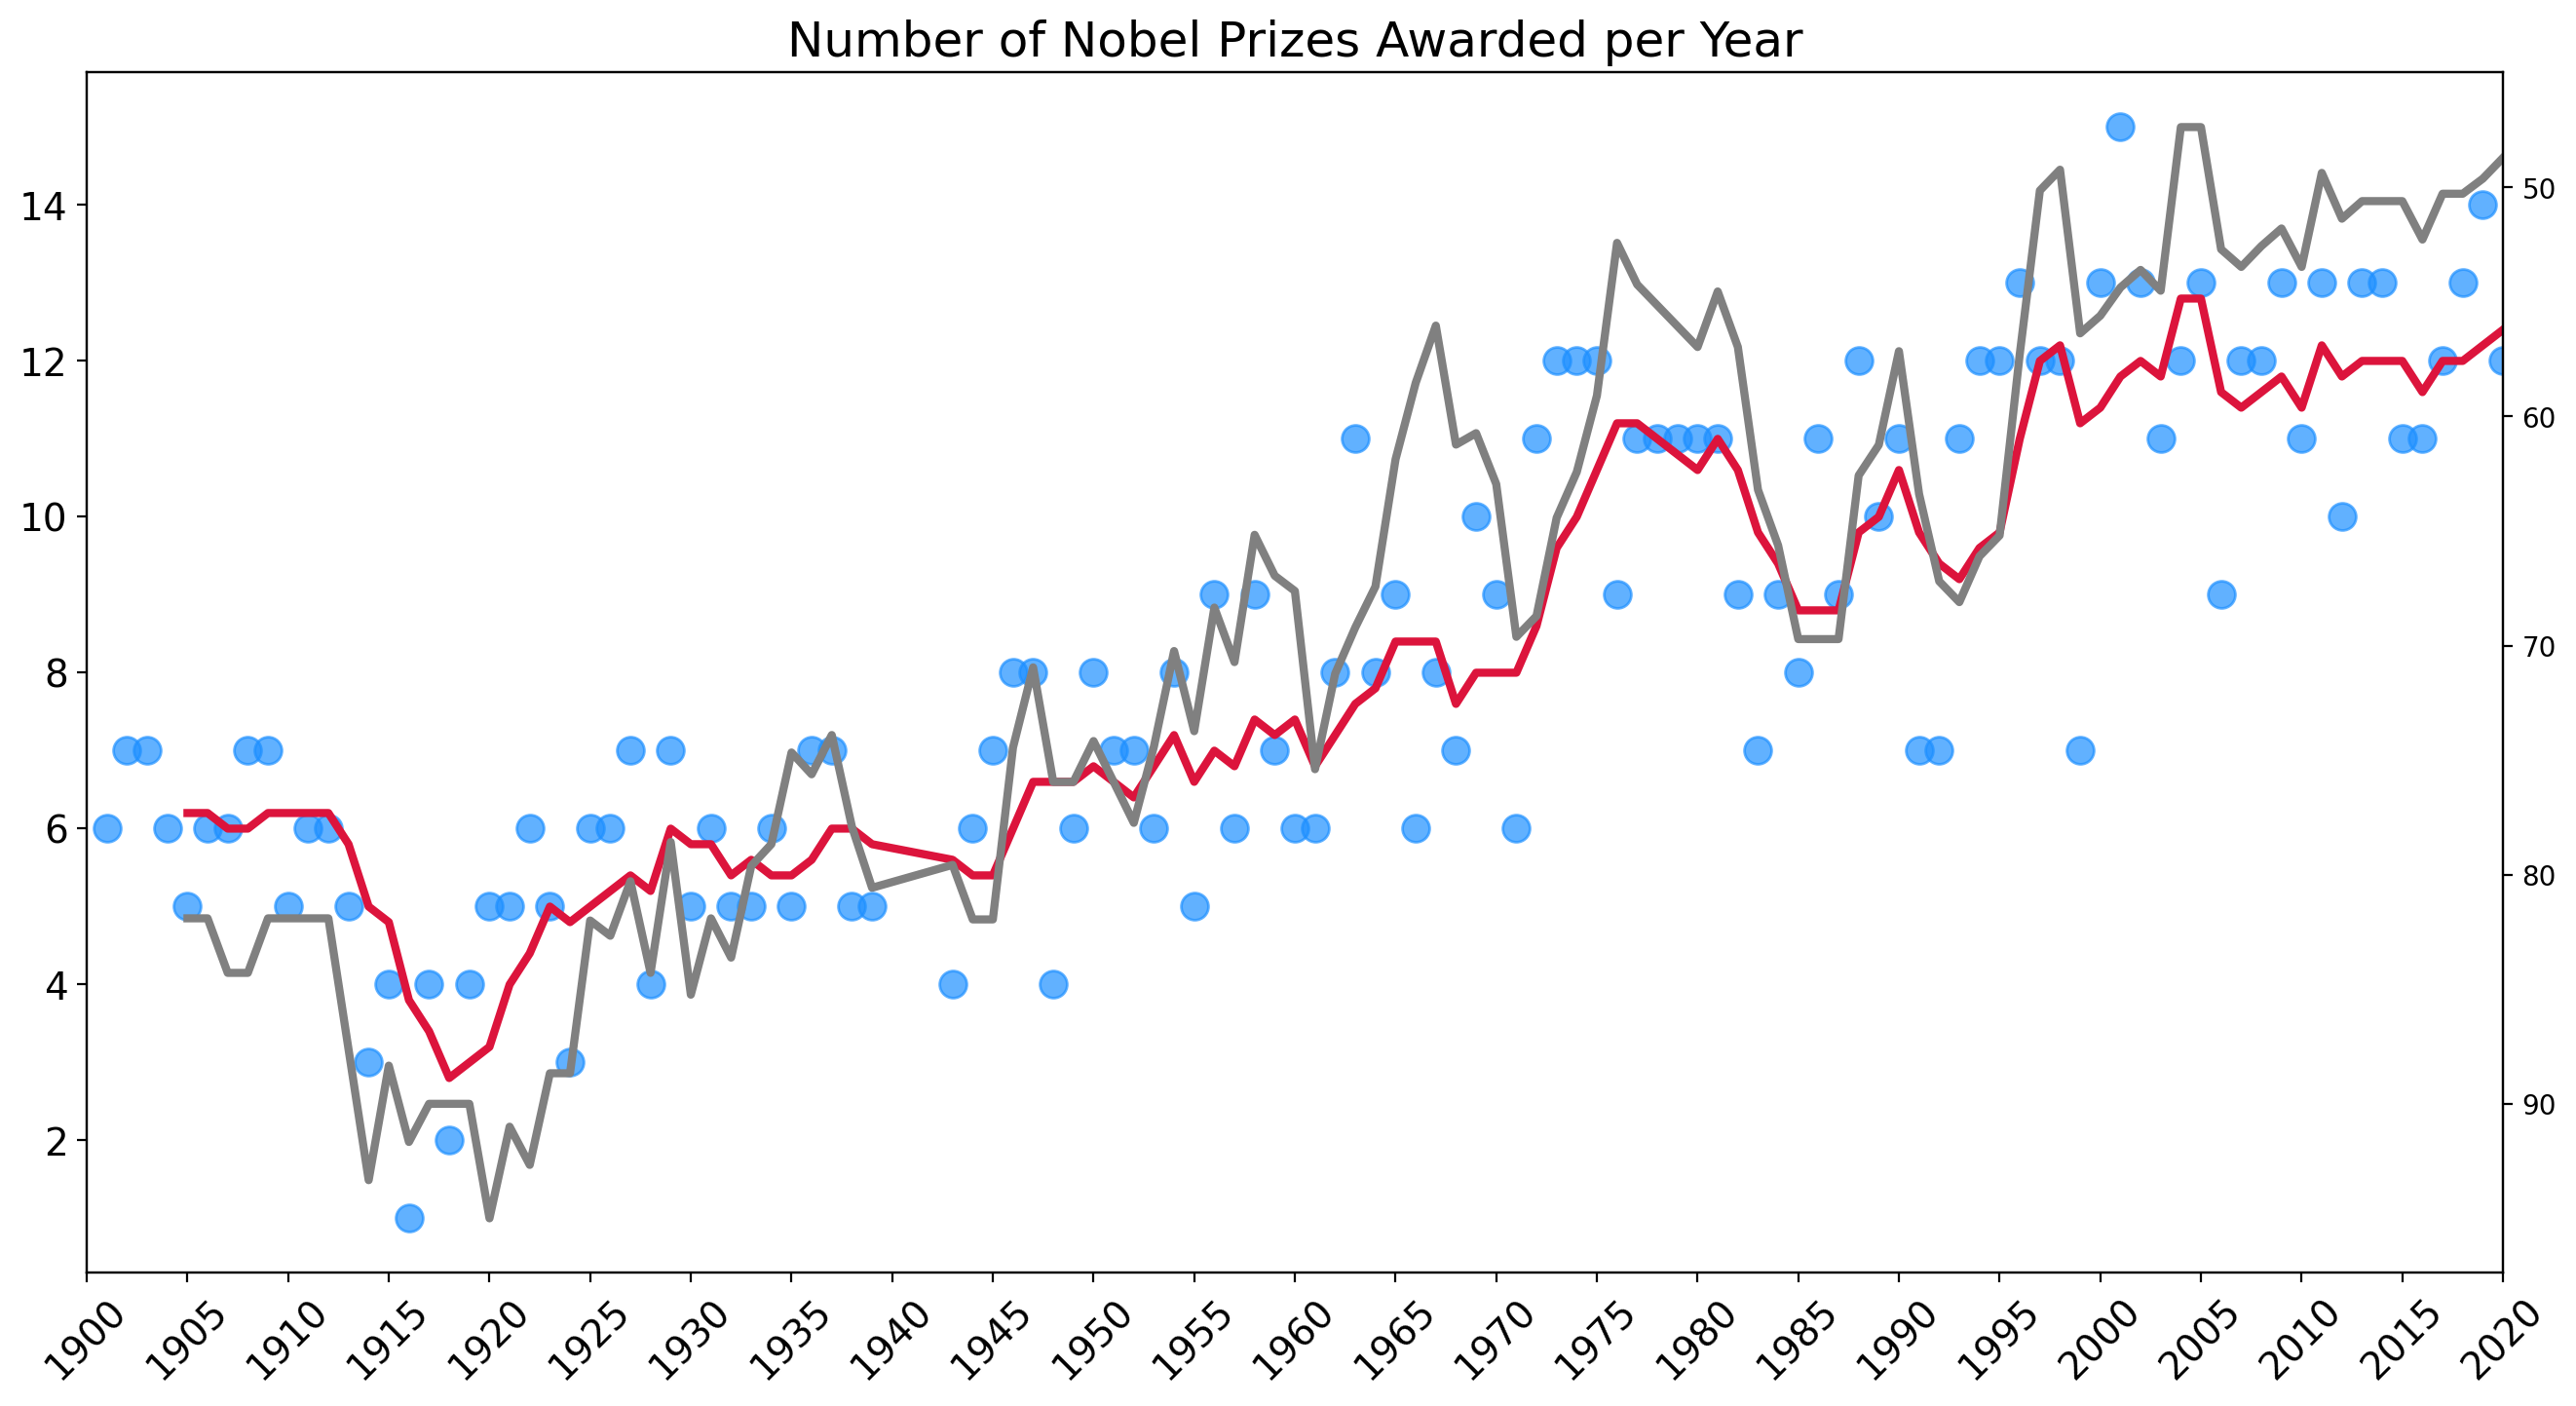

In [29]:
# See if you can invert the secondary y-axis to make the relationship even more clear.
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
               fontsize=14,
               rotation=45)

ax = plt.gca() # get current axis
ax2= ax.twinx()
ax.set_xlim(1900, 2020)

ax2.invert_yaxis()

ax.scatter(x=prize_per_year.index,
               y=prize_per_year.values,
               c='dodgerblue',
               alpha=0.7,
               s=100,)

ax.plot(prize_per_year.index,
            moving_average.values,
            c='crimson',
            linewidth=3,)


ax2.plot(average_price_per_year.index,
            rolling_average.values,
            c='grey',
            linewidth=3,)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [30]:
# Create the top20_countries.
top_countries = df_data.groupby(['birth_country_current'],
                                      as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [31]:
# Create a horizontal bar chart showing the number of prizes won by each country.
h_bar = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation='h',
    color=top20_countries.prize,
    color_continuous_scale='Viridis',
    title='Top 20 Countries by Number of Prizes.',
)
h_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    coloraxis_showscale=False
    )
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [32]:
map_data = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')

map_data.head()

,birth_country_current,ISO,prize
78,Zimbabwe,ZWE,1
77,Yemen,YEM,1
32,Iceland,ISL,1
41,Kenya,KEN,1
29,Guadeloupe Island,GLP,1


In [33]:
fig = px.choropleth(
    data_frame=map_data,
    locations='ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale=px.colors.sequential.matter,
)

fig.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [34]:
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [35]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)

merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [36]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes',
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [37]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()

prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [ ]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                                  'year']).sum().groupby(level=[0]).cumsum()

cumulative_prizes.reset_index(inplace=True)

cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                      x='year',
                      y='prize',
                      color='birth_country_current',
                      hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                          yaxis_title='Number of Prizes')

l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [84]:
# Get organizations that make up the top 20.
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [85]:
# Create a bar chart showing the organisations affiliated with the Nobel laureates.
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

**Q. How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?**

A. _20 and 29 respectively_

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [86]:
top20_org_city = df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})

top20_org_city.sort_values('prize', inplace=True)

top20_org_city = top20_org_city[-20:]

top20_org_city

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [89]:
city_bar = px.bar(
    x=top20_org_city.prize,
    y=top20_org_city.organization_city,
    orientation='h',
    color=top20_org_city.prize,
    color_continuous_scale='Bluered',
    title='Which Cities Do the Most Research?',
)

city_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='City',
    coloraxis_showscale=False,
)

city_bar.show()

**Q. Where is the number one hotspot for discoveries in the world?**

A. _Cambridge, MA_

**Q. Which city in Europe has had the most discoveries?**

A. _Berlin_

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [66]:
top20_birth_cities = df_data.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})

top20_birth_cities.sort_values('prize', inplace=True)

top20_birth_cities = top20_birth_cities[-20:]

top20_birth_cities

,birth_city,prize
343,"Milwaukee, WI",3
87,Cairo,4
356,Montreal,4
428,"Pittsburgh, PA",4
167,Frankfurt-on-the-Main,5
440,Prague,5
515,Stockholm,6
210,Hamburg,6
363,Munich,7
358,Moscow,7


In [90]:
birth_city_bar = px.bar(
    x=top20_birth_cities.prize,
    y=top20_birth_cities.birth_city,
    orientation='h',
    color=top20_birth_cities.prize,
    color_continuous_scale='Plasma',
    title='Where were the Nobel Laureates Born?',
)

birth_city_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='City of Birth',
    coloraxis_showscale=False,
)

birth_city_bar.show()

**Q. What percentage of the United States prizes came from Nobel laureates born in New York?**

A. _18.86%_

**Q. How many Nobel laureates were born in London, Paris and Vienna?**

A. _59_

**Q Out of the top 5 cities, how many are in the United States?**

A. _2_

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [80]:
df_org = df_data.groupby(by=['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = df_org.sort_values('prize', ascending=False)

country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [81]:
fig=px.sunburst(
    data_frame=country_city_org,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
)

fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [116]:
# Calculate the age of the laureate in the year of the ceremony
# Add the result as a column winning_age to df_data.
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year

df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'winning_age'],
      dtype='object')

### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [121]:
df_data.describe()

,year,winning_age
count,962.00,934.00
mean,"1,971.82",59.95
std,33.81,12.62
min,"1,901.00",17.00
25%,"1,948.00",51.00
50%,"1,977.00",60.00
75%,"2,001.00",69.00
max,"2,020.00",97.00


In [134]:
youngest_id = df_data.winning_age.idxmin()
oldest_id = df_data.winning_age.idxmax()
print(f"Name of the youngest Nobel laureate: {df_data.full_name[youngest_id]}.\nWon the prize for: {df_data['category'][youngest_id]}")
print(f"\nName of the oldest Nobel laureate: {df_data.full_name[oldest_id]}.\nWon the prize for: {df_data['category'][oldest_id]}")

Name of the youngest Nobel laureate: Malala Yousafzai.
Won the prize for: Peace

Name of the oldest Nobel laureate: John Goodenough.
Won the prize for: Chemistry


**Q. What is the average age of a winner?**

A. _59.95 years old_

**Q. 75% of laureates are younger than what age when they receive the prize?**

A. _69 years old_

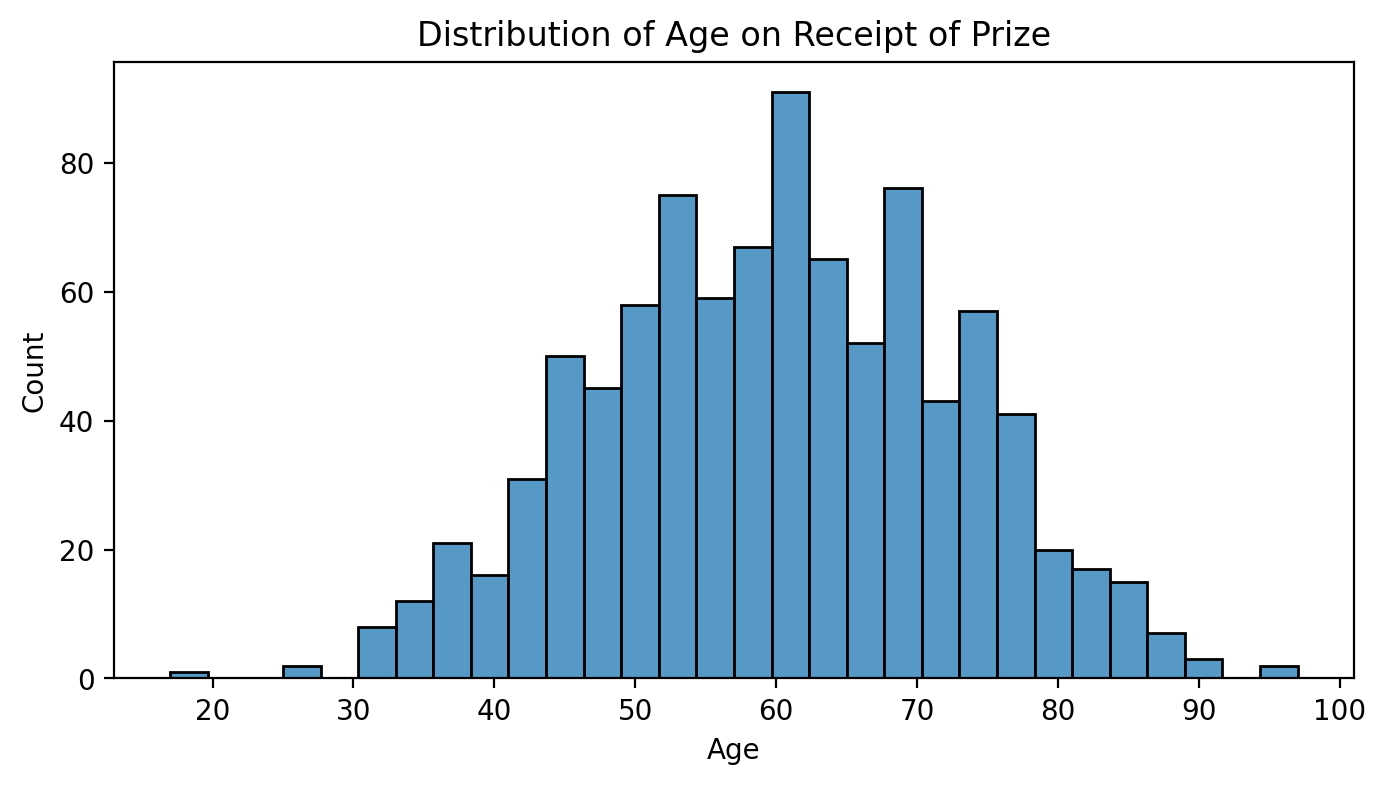

In [135]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30
             )
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [136]:
# Calculate the descriptive statistics for the age at the time of the award.
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

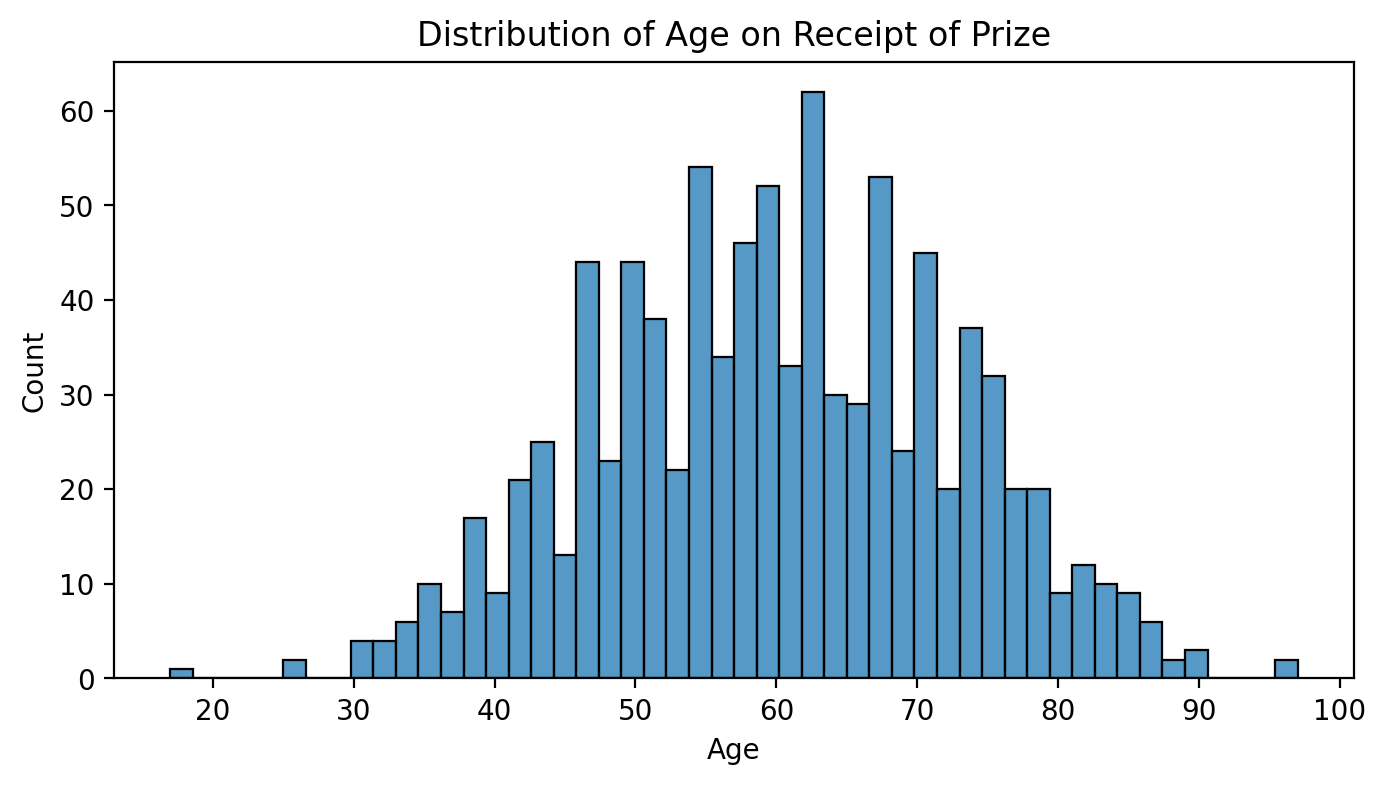

In [137]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=50
             )
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


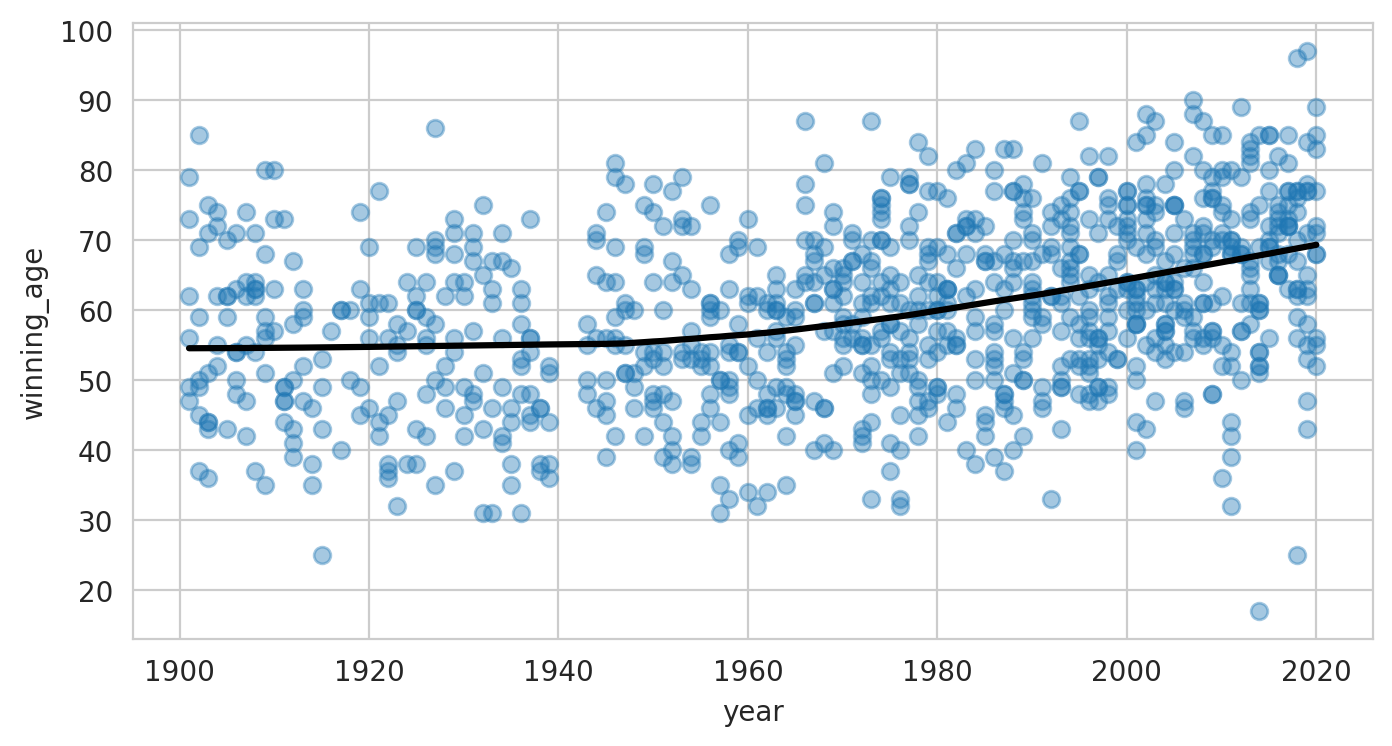

In [142]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=df_data,
              x='year',
              y='winning_age',
              lowess=True,
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'},
              )
  plt.show()

From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

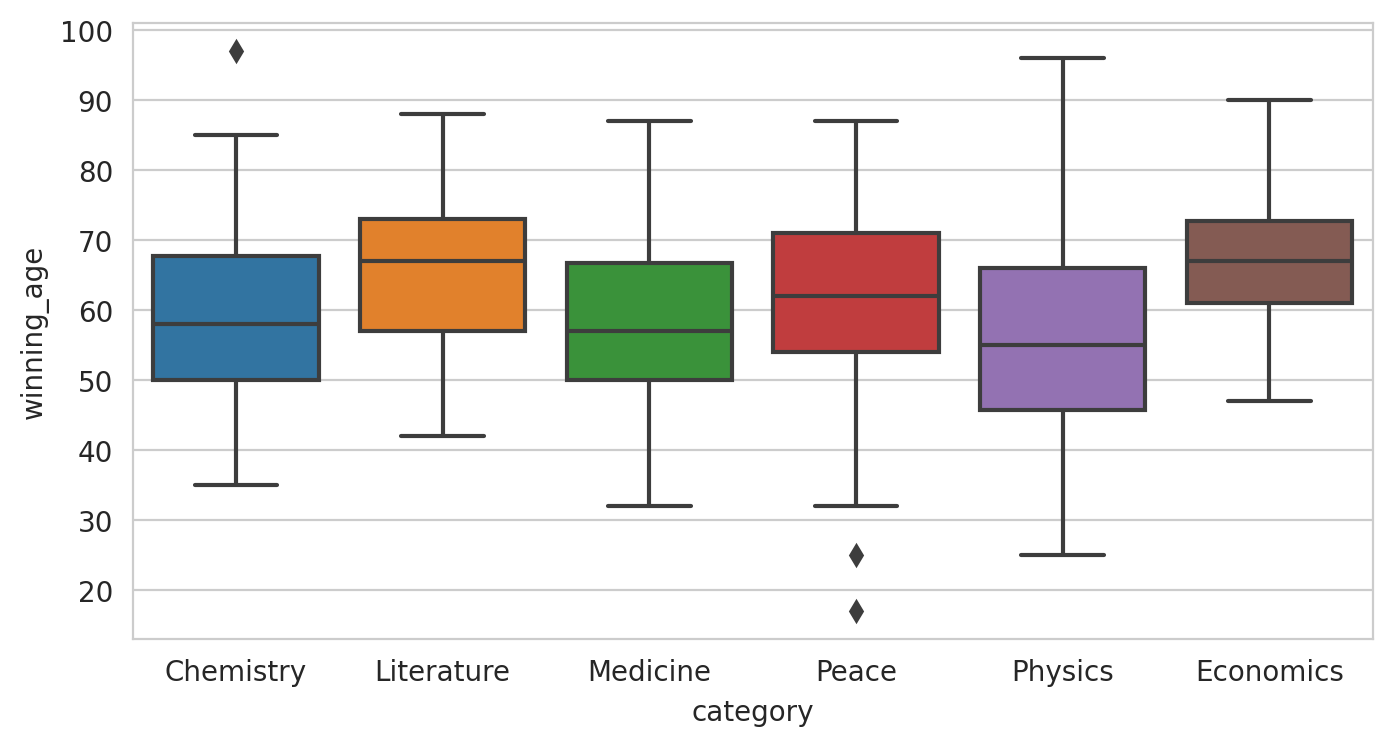

In [143]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.boxplot(data=df_data,
              x='category',
              y='winning_age')

plt.show()

**Q. In which prize category are the average winners the oldest?**

A. _Literature_

**Q. In which prize category are the average winners the youngest?**

A. _Physics_

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


<Figure size 1600x800 with 0 Axes>

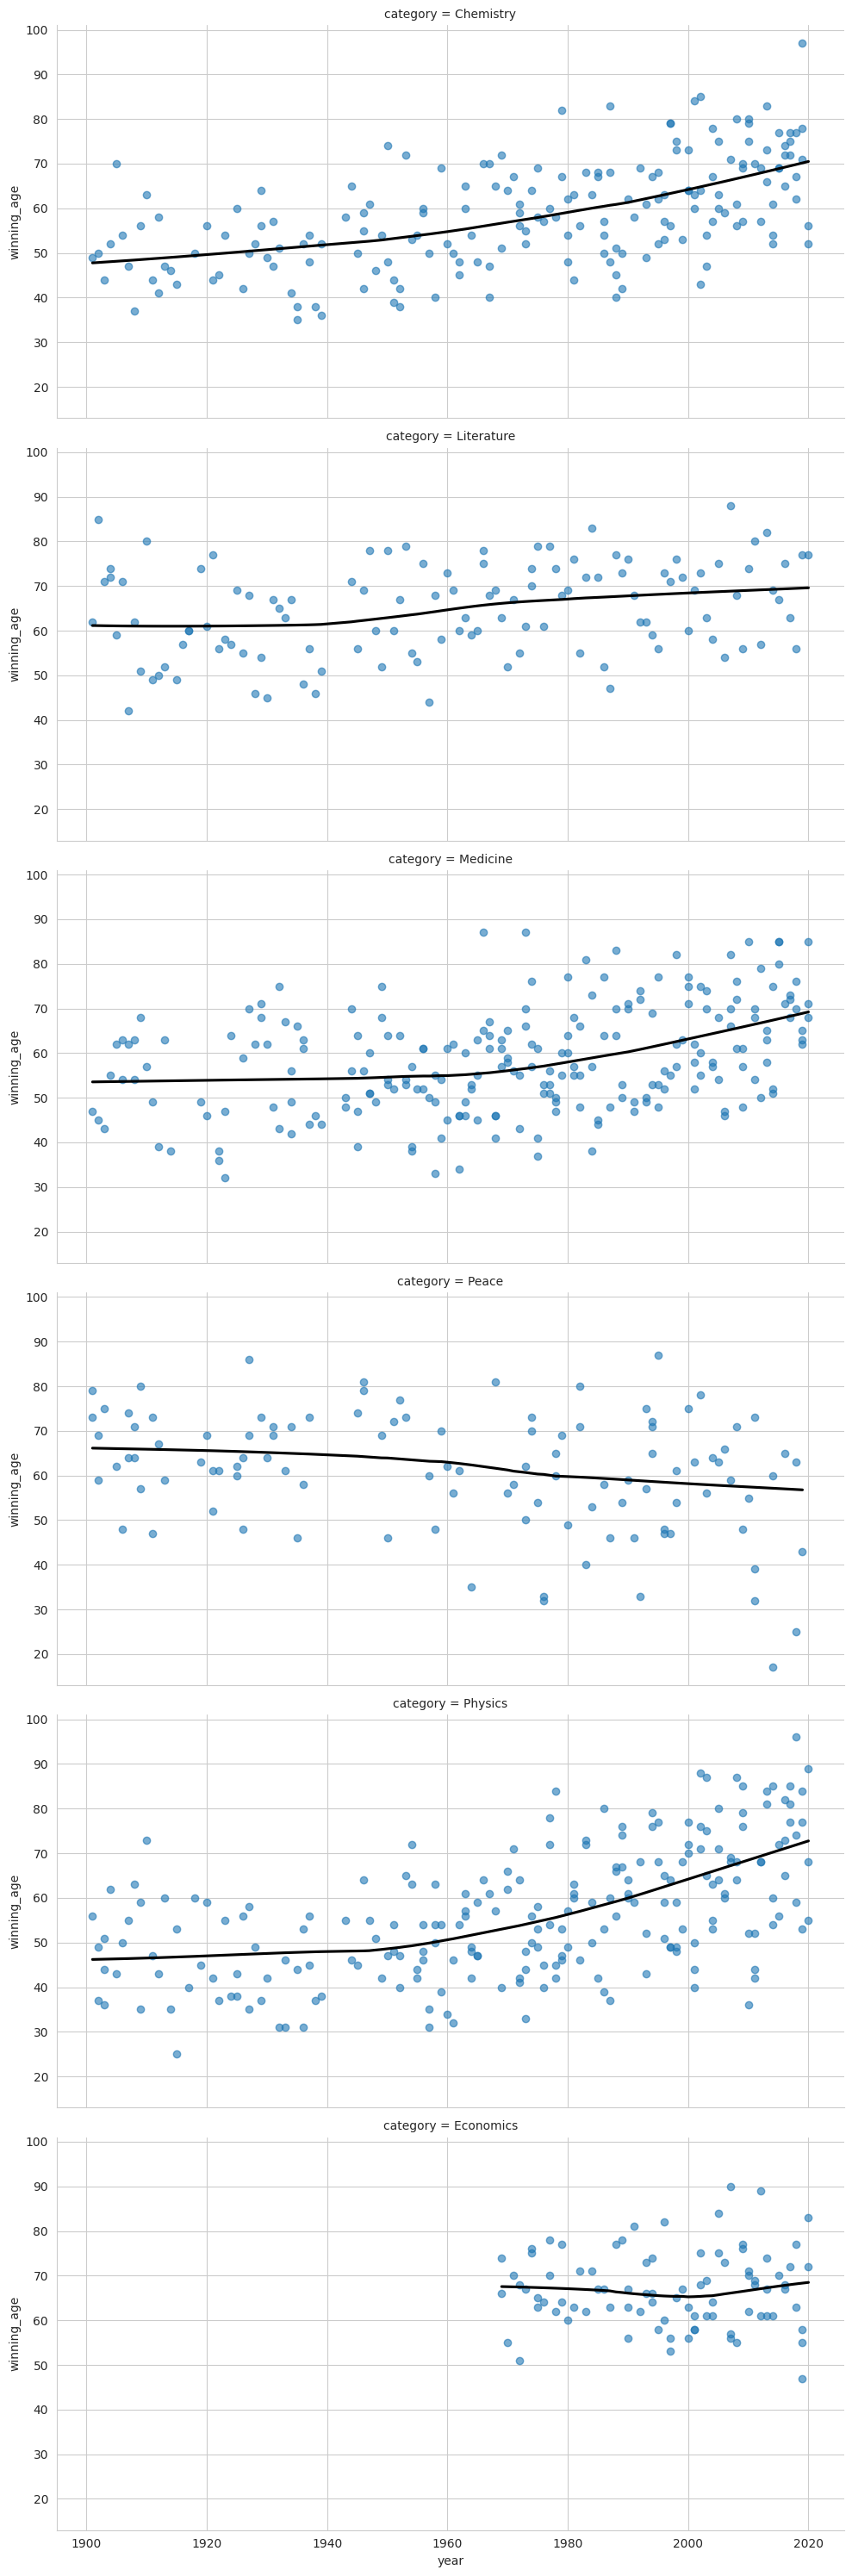

In [147]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.lmplot(data=df_data,
              x='year',
              y='winning_age',
             row="category",
             lowess=True,
             aspect=2,
             scatter_kws={'alpha': 0.6},
             line_kws={'color': 'black'}
             )

plt.show()

<Figure size 1600x800 with 0 Axes>

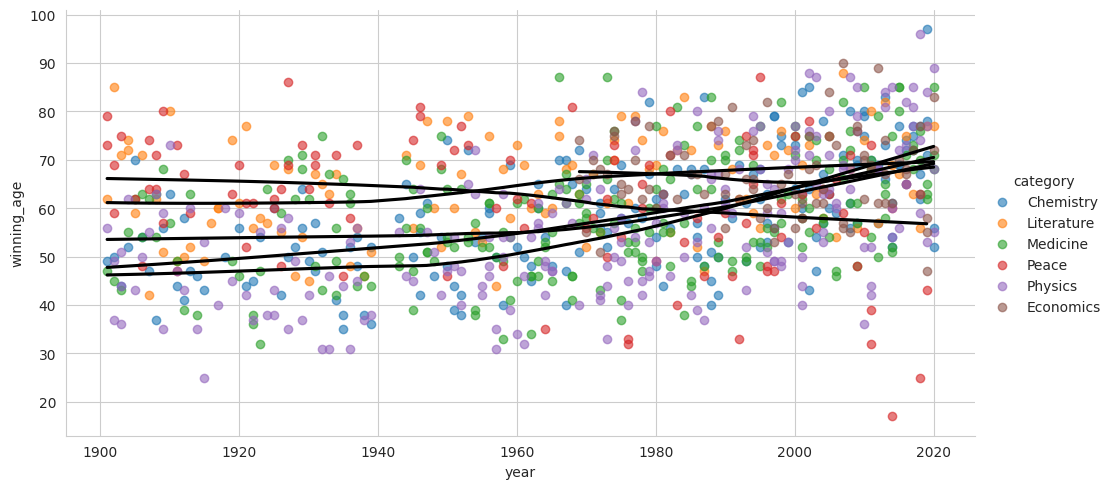

In [148]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.lmplot(data=df_data,
              x='year',
              y='winning_age',
             hue="category",
             lowess=True,
             aspect=2,
             scatter_kws={'alpha': 0.6},
             line_kws={'color': 'black'}
             )

plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!